## Content

- **Spam vs Non-Spam: Business Case**  


- **issue with Accuracy**  


- **Confusion Matrix (CM)**  


- **Confusion Matrix Code**  


- **Precision**  
    - **precision code**  


- **Recall**  
    - **Recall code**  








<center><img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/085/721/original/download.png?1723456062' width=800></center>



## Spam vs Non-Spam: Business Case






<center><img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/061/884/original/z.png?1705232975' width=800></center>

Lets Load the data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
!gdown 1CgBW5H54YfdYtJmYE5GWctaHZSpFt71V

Downloading...
From: https://drive.google.com/uc?id=1CgBW5H54YfdYtJmYE5GWctaHZSpFt71V
To: /content/spam_ham_dataset.csv
100% 5.50M/5.50M [00:00<00:00, 228MB/s]


In [ ]:
demo1 = pd.read_csv('spam_ham_dataset.csv')
demo1.drop(['Unnamed: 0','label'],axis=1,inplace=True)
demo1.head()

,text,label_num
0,Subject: enron methanol ; meter # : 988291\r\n...,0
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,"Subject: photoshop , windows , office . cheap ...",1
4,Subject: re : indian springs\r\nthis deal is t...,0


**Data Description**
<center>

| Records | Features |
| :-- | :-- |
| 5171 | 2 |


| Id | Features | Description |
| :-- | :--| :--|
|01| **text** |email text|
|02| **label_num** |0 → Not Spam, 1 → Spam|

**Observe**

As the whole data is in textual format, we use:
- Some advance Natural Language technique (which you will learn in later modules)
- To convert the text into numerical features

In [ ]:
!gdown 1dw56R8SzKgTgiKurfBLUTxmiewJacMkt

Downloading...
From: https://drive.google.com/uc?id=1dw56R8SzKgTgiKurfBLUTxmiewJacMkt
To: /content/Spam_finalData.csv
100% 1.64M/1.64M [00:00<00:00, 189MB/s]


In [ ]:
dt = pd.read_csv('Spam_finalData.csv')

In [ ]:
dt.head()

,label_num,Feature0,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,Feature9,Feature10,Feature11,Feature12,Feature13,Feature14
0,0,-0.031489,-0.003323,-0.071238,0.047743,0.060798,0.046597,-0.069530,-0.000031,-0.037924,0.024059,-0.015085,-0.007752,-0.021617,-0.025395,0.046050
1,0,-0.122601,0.114176,0.460451,0.000953,0.014707,0.007610,-0.011173,-0.052478,0.040209,0.000076,0.010306,0.023397,-0.007294,0.063543,0.081119
2,0,-0.076681,-0.084330,-0.054658,-0.048236,-0.019999,-0.045909,-0.004712,-0.001524,0.013735,-0.022429,0.010273,-0.007458,-0.044340,-0.051093,0.025553
3,1,-0.075948,-0.059706,-0.025301,-0.037603,-0.001208,-0.030660,0.018873,-0.013434,-0.014981,0.000741,0.005653,0.032153,0.001884,-0.018005,-0.011060
4,0,-0.054680,0.033033,-0.090885,-0.047280,-0.029304,0.085893,-0.105351,-0.053915,-0.006857,0.021673,0.056718,0.006140,0.042217,0.018862,-0.007373


**observe**

The text feature is now converted to 15 features [```Feature0 - Feature14 ```] with numerical values

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(dt.drop(['label_num'],axis=1),dt['label_num'])

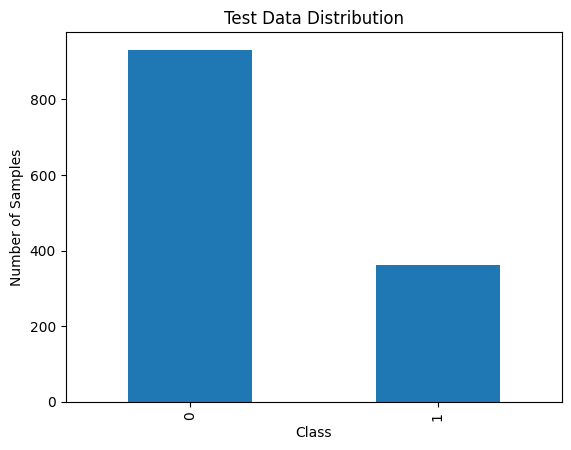

In [ ]:
y_test.value_counts().plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.title('Test Data Distribution')
plt.show()

**Observe**

In the data, samples of **spam** (class 1 ) $\approx 850$ and samples of **not Spam** (class 0) $\approx 350$. This means:

- **Not spam** $\approx \frac{850}{1200} \times 100 = 70.83$ %
- **spam** $\approx \frac{350}{1200} \times 100 = 29.17$ %

<br>

**note:**  As the data distribution is irregular, meaning one class dominates the other, this is known as **imbalance Data**

In [ ]:
from sklearn.linear_model import LogisticRegression


model = LogisticRegression()
model.fit(X_train,y_train)


LogisticRegression()

In [ ]:
print('Model Accuracy:',model.score(X_test,y_test))

Model Accuracy: 0.9319412219644239


#### Is this model with accuracy 93.5% a good one ?


<center><img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/061/888/original/z.png?1705233125' width=800></center>

<center><img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/061/890/original/z.png?1705233164' width=800></center>

## **Issue with Accuracy Metric**

#### What causes the accuracy to be a bad metric ?

1. Accuracy **doesn't work** when we have **imbalanced dataset**
2. As our **major goal** is to **correctly classify Spam data**,
 - Accuracy **lacks** in providing a **class-wise/granular metric**



<center><img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/061/892/original/z.png?1705233192' width=800></center>

<center><img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/061/894/original/z.png?1705233221' width=800></center>

## **Confusion Matrix**



#### What kind of metric is required to overcome issues in accuracy  ?





<center><img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/061/896/original/z.png?1705233253' width=800></center>

Lets create a 2 x 2 matrix for Spam (**Class 1/positive class)** and Not Spam (**Class0/Negative Class**), such that:

1. For the first cell we keep the count of samples
 - where $\hat{y_i} = 0 $, and  and $y_i = 0$
 - Lets call this **True Negative (TN)**

2. For the second cell we keep the count of samples
 - where $\hat{y_i} = 1 $, and  and $y_i = 0$
 - Lets call this **False Positive (FP)**

<br>

3. For the third cell we keep the count of samples
 - where $\hat{y_i} = 0 $, and  and $y_i = 1$
 - Lets call this **False Negative (FN)**

4. For the fourth cell we keep the count of samples
 - where $\hat{y_i} = 1 $, and  and $y_i = 1$
 - Lets call this **True Positive (TP)**


<br>

<center><img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/061/898/original/z.png?1705233352' width=800></center>

<center><img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/061/899/original/z.png?1705233379' width=800></center>

### Confusion matrix for multi class ?

<center><img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/061/900/original/z.png?1705233406' width=800></center>

## **Understanding Confusion Matrix**

#### if the test data has 360 non-spam and 40 spam samples, then what will be **TF, TP, FP, FN** for an **ideal(Best) model** ?



<center><img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/061/905/original/z.png?1705234222' width=800></center>

<center><img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/061/906/original/z.png?1705234247' width=800></center>

<center><img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/061/907/original/z.png?1705234272' width=800></center>

<center><img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/061/909/original/z.png?1705234303' width=800></center>

#### We have TP, TN , FP , FN, Can we find accuracy ?


<center><img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/061/910/original/z.png?1705234331' width=800></center>


- In Confusion Matrix, $TP+TN$ captures the correct prediction
- While, $TP+TN+FP+FN$ captures the total number of samples
<br>

Hence:
- $Accuracy = \frac{TP+TN}{TP+TN+FP+FN}$


<center><img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/061/912/original/z.png?1705234359' width=800></center>

## **Confusion Matrix Code**

#### Lets use sklearn `confusion_matrix` function to get the values

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = model.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix # 2D np array

array([[866,  65],
       [ 23, 339]])

#### How do we know which one is what?

Lets check the sklearn [documentation ](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)



<center><img src='https://drive.google.com/uc?id=188YickYYIUu2KewXShVd2Ds3a2fjpQLa' width=800></center>






But the `ConfusionMatrixDisplay` plotting functionality in sklearn makes this easy

In [ ]:
from matplotlib import pyplot as plt

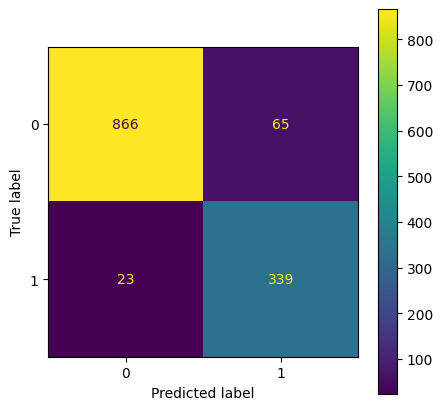

In [ ]:
# ax used here to control the size of confusion matrix
fig, ax = plt.subplots(figsize=(5,5))
ConfusionMatrixDisplay(conf_matrix).plot(ax = ax)

Finding Accuracy using Confusion Matrix

In [ ]:
np.diag(conf_matrix).sum() / conf_matrix.sum()

0.934261407579273

## **Precision**


#### What can be done with Confusion Matrix to have a metric better than Accuracy ?

<center><img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/061/918/original/z.png?1705234484' width=800></center>

#### Which amongst the two scenarios is more hazardeous ?


<center><img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/061/919/original/z.png?1705234510' width=800></center>

<center><img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/061/921/original/z.png?1705234536' width=800></center>

<center><img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/061/922/original/z.png?1705234566' width=800></center>


#### What will be the precision for an ideal model ?




<center><img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/061/924/original/z.png?1705234593' width=800></center>

<center><img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/061/925/original/z.png?1705234625' width=800></center>

## **Precision Code**

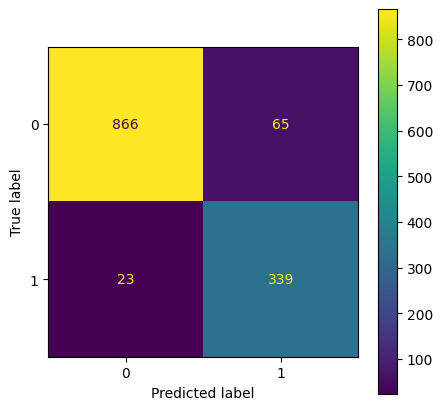

In [ ]:
fig, ax = plt.subplots(figsize=(5,5))
ConfusionMatrixDisplay(conf_matrix).plot(ax = ax)


Scratch Implementation

In [ ]:
def precision_calc(conf):
  tp = conf[1,1]
  fp = conf[0,1]

  return tp/(tp+fp)

In [ ]:
precision_calc(conf_matrix)

0.8582089552238806

Using Sklearn's precision Score

In [ ]:
from sklearn.metrics import precision_score

precision_score(y_test, y_pred)

0.8582089552238806

**observe**

Even though the model has a lower precision value than accuracy:
- Its still a great model because of its high precision value

## **Recall**

<center><img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/061/928/original/z.png?1705234684' width=800></center>




#### Which among the two is more dangerous ?




<center><img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/061/930/original/z.png?1705234713' width=800></center>




<br>



<center><img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/061/931/original/z.png?1705234737' width=800></center>

#### What will be the recall for a dumb model ?


<center><img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/061/933/original/z.png?1705234784' width=800></center>




Ans: As dumb model always predicts not-spam (class0):
- Its $TP =0$ and $FN = 45$ , hence $Recall = \frac{TP}{TP+FN} =  \frac{0}{0+45} = 0$






<br>

#### What will be the recall for an ideal model ?


<center><img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/061/934/original/z.png?1705234811' width=800></center>


As ideal model always predicts correctly:
- Its $TP = 45 $ and $FN = 0$, hence $Recall = \frac{TP}{TP+FN} =  \frac{45}{45+0} = 1$

<br>


Hence the range of Recall:
- $Recall \in [0,1]$


## **Recall Code**

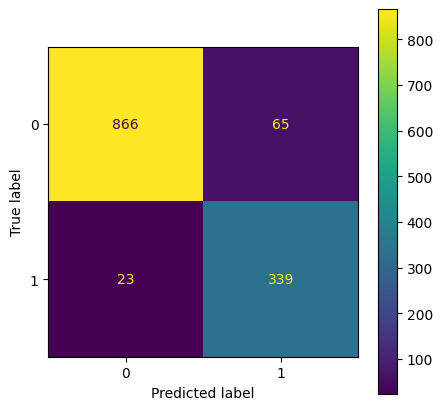

In [ ]:
fig, ax = plt.subplots(figsize=(5,5))
ConfusionMatrixDisplay(conf_matrix).plot(ax = ax)

Scratch Implementation

In [ ]:
def recall_calc(conf):
  tp = conf[1,1]
  fn = conf[1,0]

  return tp/(tp+fn)

In [ ]:
recall_calc(conf_matrix)

0.9249329758713136

Using Sklearn's precision Score

In [ ]:
from sklearn.metrics import recall_score

recall_score(y_test, y_pred)

0.9249329758713136

**observe**

The model's recall value is almost very close to accuracy :
- It shows the  model has very low FN

## **Hack to remember Precision and Recall !**

#### What is the best way to remember the difference between Precision and Recall ?

<center><img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/061/937/original/z.png?1705234920' width=800></center>

<center><img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/061/939/original/z.png?1705234945' width=800></center>

## **F1 score**

#### Can both FN and FP be important for a real world problem ?



Lets take an example:


Imagine a model is used to classify credit card transactions as either fraudulent or legitimate.



<center><img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/061/940/original/z.png?1705234973' width=800></center>

<center><img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/061/941/original/z.png?1705234997' width=800></center>

As FN and FP are both important, we train three different models such that:

1. M1 has precision  = 0.3 and recall = 0.8
2. M2 has precision  = 0.2 and recall = 0.9
3. M3 has precision  = 0.7 and recall = 0.4



#### Which model among M1,M2,M3 is the best ?





<center><img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/061/943/original/z.png?1705235023' width=800></center>


Ans: Based on Precision:
- M3 is the best model

And based on Recall
- M2 is the best model

<br>

Hence need a way to combine Precision and Recall

#### Will simple arthematic mean (simple avg.) work ?


<center><img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/061/944/original/z.png?1705235084' width=800></center>

No, because the arthemetic mean becomes:

-  M1 $= \frac{0.3+0.8}{2} = 0.55 $
-  M2 $ = \frac{0.2+0.9}{2} = 0.55 $
-  M3 $ = \frac{0.7+0.4}{2} = 0.55 $

<br>

This again brings us to the square one
- as we still cant say which model is better


#### What if we use **Harmonic mean** ?

<center><img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/061/945/original/z.png?1705235116' width=800></center>

Harmonic Mean $  [Precision(Pr), Recall (Re)] =\frac{2}{\frac{1}{Pr}+\frac{1}{Re}} $

Which on solving becomes:
- Harmonic Mean $  = 2 \times \frac{Pr \times Re}{Pr+Re} $

<br>

**Note:** this harmonic mean of Precision and Recall is called **F1-Score**

# **Understanding F1-Score**

<center><img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/061/946/original/z.png?1705235146' width=800></center>

1. M1 has precision  = 0.3 and recall = 0.8
2. M2 has precision  = 0.2 and recall = 0.9
3. M3 has precision  = 0.7 and recall = 0.4

#### How does F1-score finds the better model ?

Ans) The  F1Score for each model:

1. M1: F1 score$ = 2 \times \frac{0.3 \times 0.8}{1.10} = 0.44$
2. M2: F1 score$ = 2 \times \frac{0.2 \times 0.9}{1.10} = 0.33$
3. M3: F1 score$ = 2 \times \frac{0.7 \times 0.4}{1.10} = 0.51$


<br>

Clearly, M3 is the best model to pick

**Quiz-14**

```
Why does the F-1 score use Harmonic Mean (HM) instead of Arithmetic Mean (AM) ?

a. AM penalizes models the most when even Precision and Recall are low.
b. HM penalizes models the most when even Precision and Recall are low.
c. HM penalizes models the most when even Precision and Recall are high.
d. AM penalizes models the most when even Precision and Recall are high.

```
**ANSWER**

b. HM penalizes models the most when even Precision and Recall are low.

**quiz-15**

```
Which of the following statements is true about the F1 score?

a) The F1 score is a measure of overall accuracy of a model.
b) The F1 score is a measure of a model prediction on positive class.
c) The F1 score takes into account both precision and recall.
d) The F1 score is a measure of a model prediction on negative class.


```

**Correct Answer**

c) The F1 score takes into account both precision and recall.

#### What will be the f1 score for dumb model?




<center><img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/061/947/original/z.png?1705235178' width=800></center>

Since for a dumb model:
- precision = recall = 0

Hence f1-score$ = 2 \times \frac{precision \times recall}{precision + recall} = \frac{0}{0}$

<br>

#### How to avoid the math error $\frac{0}{0}$ ?
ans: add a very small value $10^-6$

<br>

Hence for dumb model:
- F1score = 0

#### What will be the f1 score for ideal model?




<center><img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/061/948/original/z.png?1705235206' width=800></center>

Since for a ideal model:
- precision = recall = 1

Hence f1-score$ = 2 \times \frac{precision \times recall}{precision + recall} = \frac{2}{2} = 1$

<br>


Hence the range for F1score becomes:
- $F1score \in [0,1]$

#### Can we calculate it using sklearn as well ?

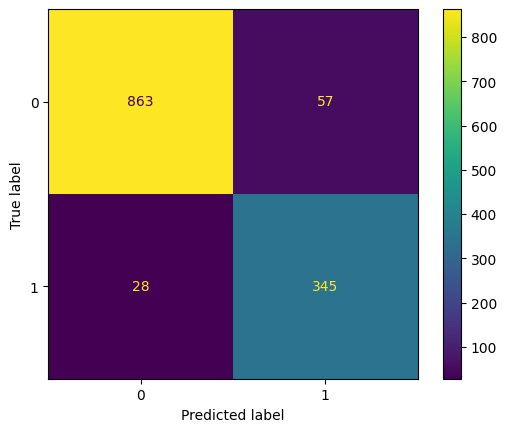

In [ ]:
ConfusionMatrixDisplay(conf_matrix).plot()

scratch implementation

In [ ]:
pre = precision_calc(conf_matrix)
re = precision_calc(conf_matrix)

f1 = 2* (pre*re)/(pre+re+1e-6)

print(f'f1Score:{f1}')

f1Score:0.858208455224172


In [ ]:
from sklearn.metrics import f1_score

In [ ]:
print(f'f1Score:{f1_score(y_test,y_pred)}')

f1Score:0.8903225806451612


**observe**

Clearly our model is a very decent one:
- Cause even after imbalance data
- the model f1 score is great.

The difference in scratch implementation and Sklearn f1score:
- Because Sklearn uses a different value to counter zero division

#### Extra Read: Fbeta score

 https://colab.research.google.com/drive/1_FymJlX0SjSuKpYrEueMesop0UfKOh9n?ouid=108305148241143911482&usp=drive_link